In [1]:
import pandas as pd

# 데이터 "(2022~2023)포천시_아파트_실거래가.csv" 로드
df = pd.read_csv("(2022~2023)포천시_아파트_실거래가.csv")
df

,NetLeasableArea(㎡),Floor,YearOfBuilt,PurchasePrice
0,59.9974,14,2017,24800
1,101.7244,18,2017,41700
2,101.7244,8,2017,41700
3,74.8302,2,2017,30000
4,59.9974,14,2017,25000
...,...,...,...,...
663,84.9320,12,2006,24750
664,84.9320,2,2006,21500
665,84.9320,3,2006,24500
666,84.9320,7,2006,23500


In [2]:
# sklearn 을 활용한 선형회귀 모델링을 위해
# 데이터를 train set 과 test set으로 분리한다.

# train set: 머신러닝 모델 학습에 사용되는 데이터
# test set: 머신러닝 모델  평가에 사용되는 데이터 

from sklearn.model_selection import train_test_split

X = df[['NetLeasableArea(㎡)', 'Floor', 'YearOfBuilt']]
y = df[['PurchasePrice']]
# 20% 테스트로 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2)

print(len(X_train))
print(len(X_test)) 

534
134


In [3]:
from sklearn.preprocessing import StandardScaler

# X_train, X_test
sc = StandardScaler()

# 데이터에 정규화 적용
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
# 모델 훈련하기
from sklearn.linear_model import LinearRegression

classifer = LinearRegression()

classifer.fit(X_train, y_train) # train 데이터로 모델 학습

LinearRegression()

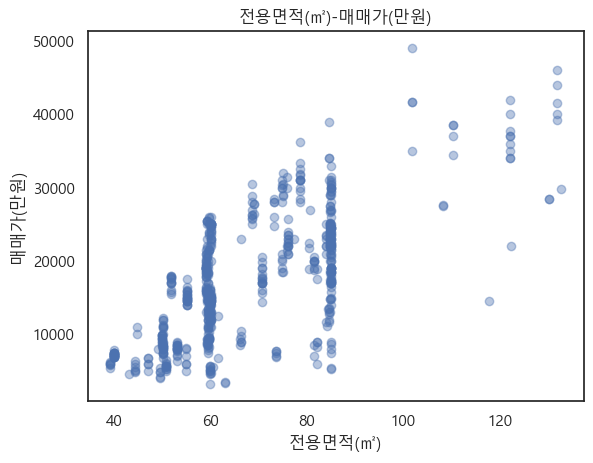

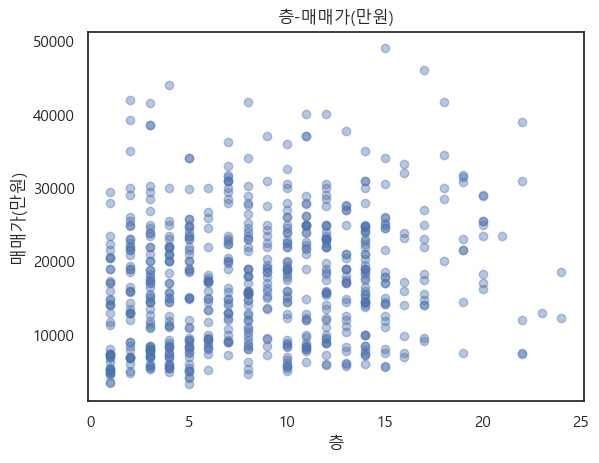

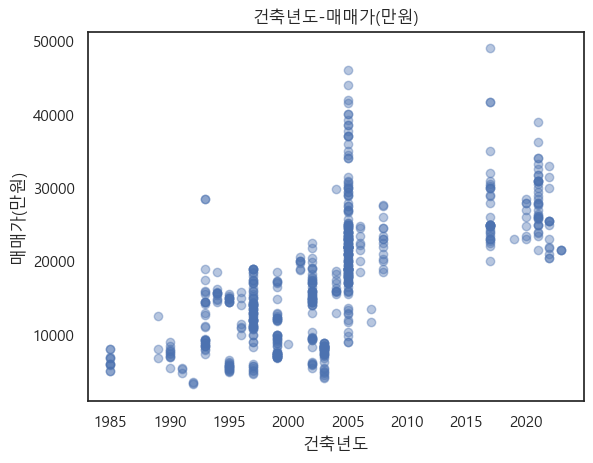

[[4792.96980441  777.55051818 4513.88652906]]


In [5]:
# scatterplot 그리기

import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

plt.scatter(df['NetLeasableArea(㎡)'], df['PurchasePrice'], alpha=0.4)
plt.xlabel("전용면적(㎡)")
plt.ylabel("매매가(만원)")
plt.title("전용면적(㎡)-매매가(만원)")
plt.show()

plt.scatter(df['Floor'], df['PurchasePrice'], alpha=0.4)
plt.xlabel("층")
plt.ylabel("매매가(만원)")
plt.title("층-매매가(만원)")
plt.show()

plt.scatter(df['YearOfBuilt'], df['PurchasePrice'], alpha=0.4)
plt.xlabel("건축년도")
plt.ylabel("매매가(만원)")
plt.title("건축년도-매매가(만원)")
plt.show()
# 속성의 가중치 출력
print(classifer.coef_) 


In [6]:
# Predict 값 도출
y_pred = classifer.predict(X_test)

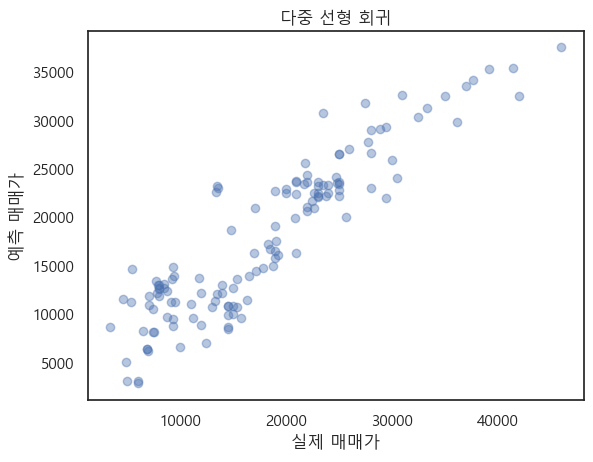

In [7]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("실제 매매가")
plt.ylabel("예측 매매가")
plt.title("다중 선형 회귀")
plt.show()

In [8]:
y_pred1 = classifer.predict(X_train) # 만들어진 모델을 학습 데이터에 적용해본다.

In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
# MAE 비교해보기
mae_train = mean_absolute_error(y_train, y_pred1)
mae_test = mean_absolute_error(y_test, y_pred)
mae_train, mae_test

#R2 square 비교해보기
r2_train = r2_score(y_train, y_pred1)
r2_test = r2_score(y_test, y_pred)
r2_train, r2_test

print(f'훈련 데이터셋의 MAE: {mae_train:,.0f}')
print(f'훈련 데이터셋의 R2: {r2_train:,.3f}')

print(f'테스트 데이터셋의 MAE: {mae_test:,.0f}')
print(f'테스트 데이터셋의 R2: {r2_test:,.3f}')

훈련 데이터셋의 MAE: 2,827
훈련 데이터셋의 R2: 0.797
테스트 데이터셋의 MAE: 3,044
테스트 데이터셋의 R2: 0.826


In [10]:
my_PurchasePrice = [[57, 20, 2020]] #전용면적, 층, 건축연도 입력
my_Test = sc.transform(my_PurchasePrice)
my_pred = classifer.predict(my_Test)
print('예측 매매가 : %.0f'%my_pred, '원')

예측 매매가 : 25199 원


C:\Users\wlsrn\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
